# Assignment: Advance Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Import basic useful libraries

In [2]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading files
df_housing = pd.read_csv('train.csv')
df_housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_housing.shape

(1460, 81)

In [5]:
# showing  10 random rows
df_housing.sample(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
702    703          60       RL         82.0    12438   Pave   NaN      IR1   
647    648          20       RL         85.0    10452   Pave   NaN      IR1   
869    870          60       RL         80.0     9938   Pave   NaN      Reg   
1356  1357          20       RL          NaN     9477   Pave   NaN      Reg   
441    442          90       RL         92.0    12108   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1210  1211          60       RL         70.0    11218   Pave   NaN      Reg   
537    538          20       RL          NaN    12735   Pave   NaN      IR1   
147    148          60       RL          NaN     9505   Pave   NaN      IR1   
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
445    446          20       RL         73.0     9855   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
702          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
647          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
869          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
1356         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
441          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1210         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
537          Lvl    AllPub  ...        0    NaN   MnWw         NaN       0   
147          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1218         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
445          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
702       7   2006       New        Partial     361919  
647       6   2008        WD         Normal     155000  
869       6   2010        WD         Normal     236000  
1356     10   2008        WD         Normal     110000  
441       9   2008        WD         Normal     118000  
...     ...    ...       ...            ...        ...  
1210      5   2010        WD         Normal     189000  
537       4   2008       COD         Normal     111250  
147       5   2010        WD         Normal     222500  
1218      7   2006        WD         Normal      80500  
445      11   2009       COD         Normal     127500  

[100 rows x 81 columns]

## Checking outliers in depedent variable

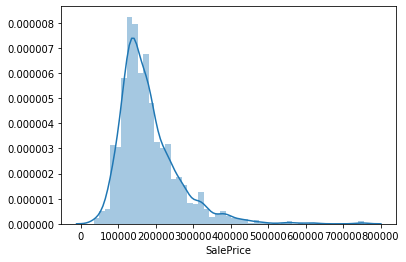

In [6]:
sns.distplot(df_housing['SalePrice'])

In [7]:
df_housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
df_housing['SalePrice'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.99999999])

0.100    106475.0000
0.200    124000.0000
0.300    135500.0000
0.400    147000.0000
0.500    163000.0000
0.600    179280.0000
0.700    198620.0000
0.800    230000.0000
0.900    278000.0000
0.950    326100.0000
0.990    442567.0100
0.995    527331.9150
1.000    754999.8541
Name: SalePrice, dtype: float64

## TBD :Maybe we should remove over 99.5 percentile

# Treat skewness in sale_price

In [9]:
df_housing['SalePrice'] = df_housing['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

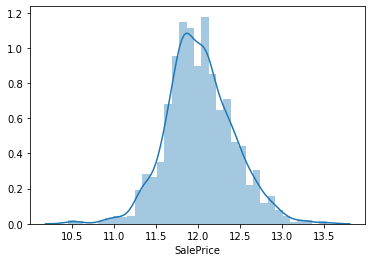

In [10]:
sns.distplot(df_housing['SalePrice'])

# DATA CLEANING

In [11]:
# checking information of data
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df_housing.shape

(1460, 81)

In [13]:
# checking null values
pd.set_option('max_rows',81)
df_housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [14]:
# percentage of null values
pd.set_option('max_rows',100)
df_housing.isnull().sum()/len(df_housing.index)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### DO SOMETHING ABOUT THE lot frontage

In [15]:
# Drop the columns having null values greater the 30%
df_housing = df_housing.dropna(thresh = len(df_housing) * .70,axis=1)
df_housing.isnull().sum()/len(df_housing.index)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [16]:
# drop null values row wise
df_housing = df_housing.dropna(how='any',axis=0)
df_housing.shape

(1094, 76)

In [17]:
df_housing.isnull().sum()/len(df_housing.index)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [18]:
pd.set_option('max_columns',78)
df_housing.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1159  1160          60       RL         76.0     9120   Pave      Reg   
524    525          60       RL         95.0    11787   Pave      IR1   
466    467          20       RL         85.0    10628   Pave      Reg   
805    806          20       RL         91.0    12274   Pave      IR1   
974    975          70       RL         60.0    11414   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1159         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
524          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
466          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
805          Lvl    AllPub       FR2       Gtl      Somerst       Norm   
974          Lvl    AllPub    Corner       Gtl      BrkSide       RRAn   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1159       Norm     1Fam     2Story            6            6       1974   
524        Norm     1Fam     2Story            7            5       1996   
466        Norm     1Fam     1Story            7            5       1970   
805        Norm     1Fam     1Story            7            5       2008   
974       Feedr     1Fam     2Story            7            8       1910   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1159          1974       Hip  CompShg     HdBoard     HdBoard    BrkFace   
524           1997     Gable  CompShg     VinylSd     VinylSd    BrkFace   
466           1970      Flat  Tar&Grv     Plywood     Plywood       None   
805           2008     Gable  CompShg     VinylSd     VinylSd      Stone   
974           1993     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1159       270.0        Gd        TA     CBlock       TA       TA   
524        594.0        Gd        TA      PConc       Gd       TA   
466          0.0        TA        Gd     CBlock       TA       Gd   
805        256.0        Gd        TA      PConc       Gd       TA   
974          0.0        TA        Gd     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1159           No          ALQ         442          Unf           0   
524            No          GLQ         719          Unf           0   
466            Gd          GLQ         778          Unf           0   
805            No          Unf           0          Unf           0   
974            No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1159        459          901    GasA        TA          Y      SBrkr   
524         660         1379    GasA        Ex          Y      SBrkr   
466         499         1277    GasA        TA          Y      SBrkr   
805        1417         1417    GasA        Ex          Y      SBrkr   
974         728          728    GasA        TA          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1159       943       933             0       1876             0             0   
524       1383      1015             0       2398             1             0   
466       1277         0             0       1277             1             0   
805       1428         0             0       1428             0             0   
974       1136       883             0       2019             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1159         2         1             4             1          Gd   
524          2         1             3             1          Gd   
466          1         0             2             1          TA   
805          2         0             3             1          Ex   
974          1         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplac

In [19]:
# drop id column its jaust an index number
df_housing.drop('Id',axis=1,inplace=True)

In [20]:
df_housing.shape

(1094, 75)

In [21]:
#drop column having 1 unique value
df_housing=df_housing.drop(df_housing.columns[df_housing.apply(lambda col: col.nunique()==1)], axis=1)
df_housing.shape

(1094, 74)

In [22]:
# drop duplicates rows
df_housing = df_housing.drop_duplicates(keep='first')
df_housing.shape

(1094, 74)

# Performing EDA

In [23]:
df_cat = df_housing.select_dtypes('object')
df_cont = df_housing.select_dtypes(['int64','float64'])

In [24]:
df_cont.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
df_cont.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247694  
1  12.109011  
2  12.317167  
3  11.849398  
4  12.429216

In [27]:
df_cat.shape,df_cont.shape

((1094, 37), (1094, 37))

In [28]:
# descriptive analysis
df_cont.describe().iloc[:,:5]

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond
count  1094.000000  1094.000000    1094.000000  1094.000000  1094.000000
mean     56.128885    70.759598   10132.346435     6.247715     5.575868
std      41.976345    24.508859    8212.249621     1.366797     1.066500
min      20.000000    21.000000    1300.000000     2.000000     2.000000
25%      20.000000    60.000000    7606.750000     5.000000     5.000000
50%      50.000000    70.000000    9444.500000     6.000000     5.000000
75%      70.000000    80.000000   11387.250000     7.000000     6.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000

## Change the style of EDA here. maybe just create a function and call it with different variables

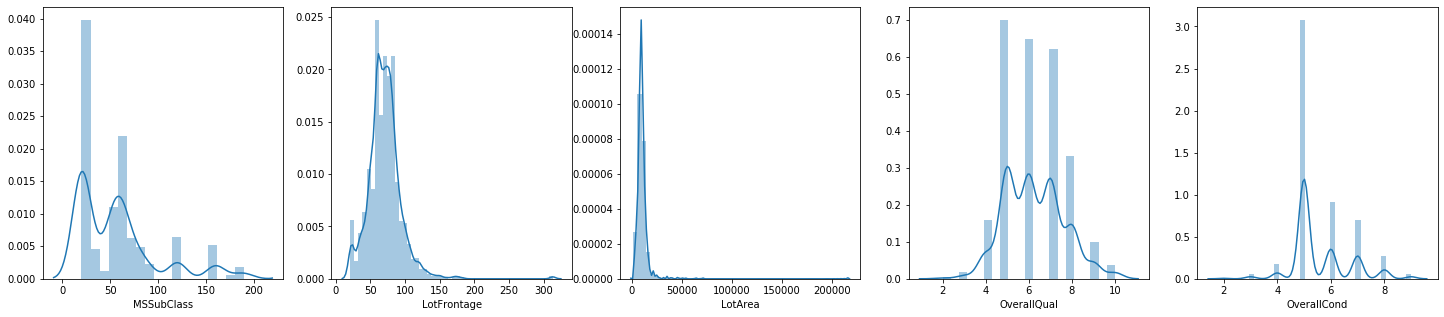

In [29]:
plt.figure(figsize=(25,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

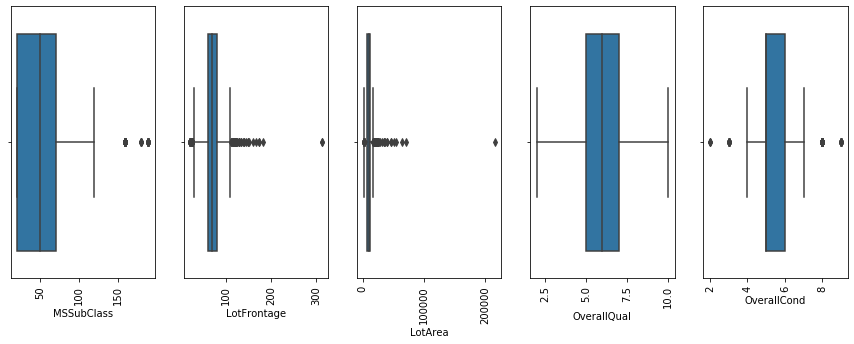

In [30]:
plt.figure(figsize=(15,5))

for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=90)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [31]:
df_cont.describe().iloc[:,5:10]

YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2
count  1094.000000   1094.000000  1094.000000  1094.000000  1094.000000
mean   1972.412249   1985.915905   109.855576   448.191956    45.252285
std      31.189752     20.930772   190.667459   468.728095   159.075003
min    1880.000000   1950.000000     0.000000     0.000000     0.000000
25%    1953.000000   1967.000000     0.000000     0.000000     0.000000
50%    1975.000000   1995.000000     0.000000   384.500000     0.000000
75%    2003.000000   2005.000000   171.750000   712.750000     0.000000
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

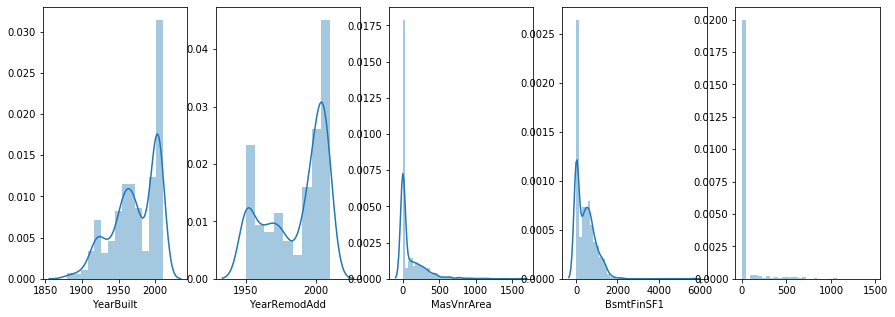

In [32]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

In [ ]:
plt.figure(figsize=(15,5))

for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=90)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [ ]:
df_cont.describe().iloc[:,10:15]

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

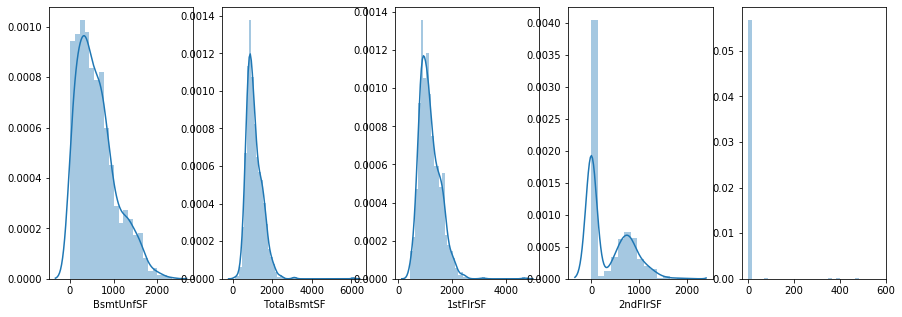

In [33]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

In [ ]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [ ]:
df_cont.describe().iloc[:,15:20]

In [ ]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

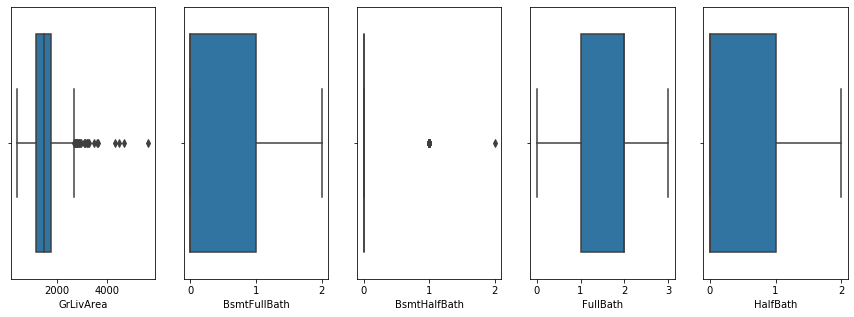

In [34]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [35]:
df_cont.describe().iloc[:,20:25]

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt
count   1094.000000   1094.000000   1094.000000  1094.000000  1094.000000
mean       2.861974      1.033821      6.570384     0.610603  1978.565814
std        0.764107      0.185841      1.584486     0.633118    25.934444
min        0.000000      1.000000      3.000000     0.000000  1900.000000
25%        2.000000      1.000000      5.000000     0.000000  1960.000000
50%        3.000000      1.000000      6.000000     1.000000  1982.000000
75%        3.000000      1.000000      7.000000     1.000000  2003.000000
max        6.000000      3.000000     12.000000     3.000000  2010.000000

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

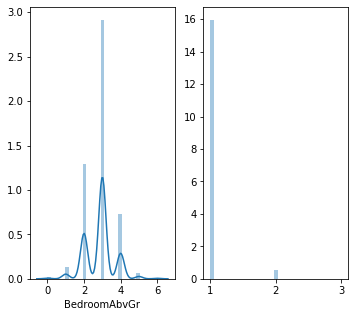

In [36]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

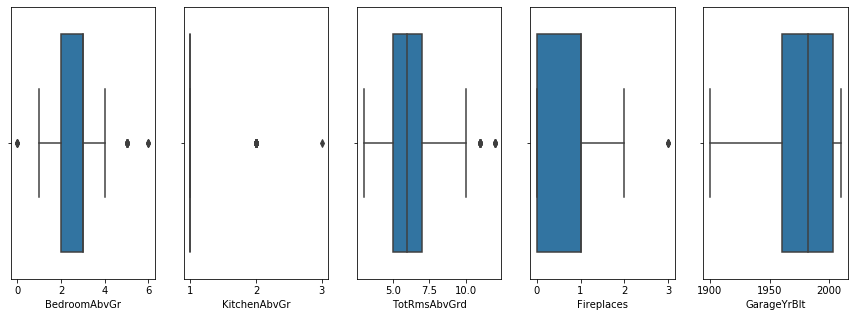

In [37]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [38]:
df_cont.describe().iloc[:,25:30]

GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch
count  1094.000000  1094.000000  1094.000000  1094.000000    1094.000000
mean      1.879342   503.760512    94.341865    46.946984      22.053016
std       0.658586   192.261314   122.624615    64.820019      61.570502
min       1.000000   160.000000     0.000000     0.000000       0.000000
25%       1.000000   360.000000     0.000000     0.000000       0.000000
50%       2.000000   484.000000     0.000000    28.000000       0.000000
75%       2.000000   602.500000   169.750000    68.000000       0.000000
max       4.000000  1418.000000   857.000000   547.000000     552.000000

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

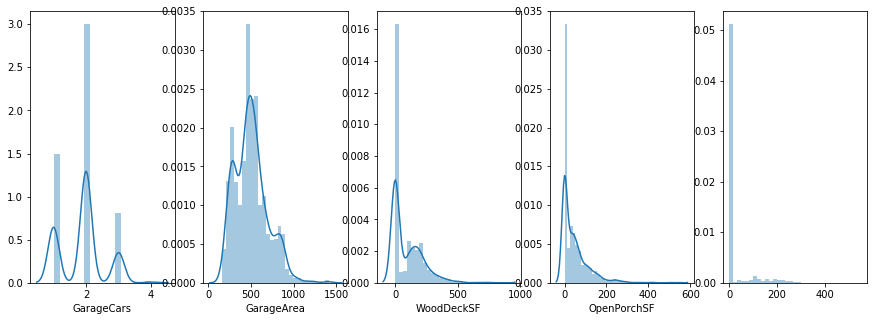

In [39]:
plt.figure(figsize=(15,5))
for i in range(25,30):
    plt.subplot(1, 5, i-24)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

In [ ]:
plt.figure(figsize=(15,5))
for i in range(25,30):
    plt.subplot(1, 5, i-24)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [ ]:
df_cont.describe().iloc[:,30:35]

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

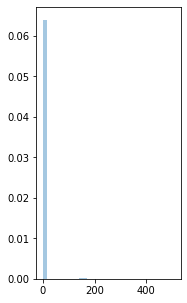

In [40]:
plt.figure(figsize=(15,5))
for i in range(30,35):
    plt.subplot(1, 5, i-29)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

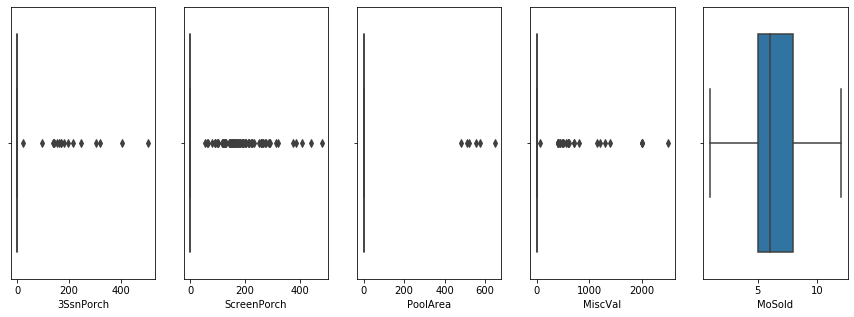

In [41]:
plt.figure(figsize=(15,5))
for i in range(30,35):
    plt.subplot(1, 5, i-29)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

In [47]:
df_cont.describe().iloc[:,35:]

YrSold      SalePrice
count  1094.000000    1094.000000
mean   2007.786106  187033.263254
std       1.334307   83165.332151
min    2006.000000   35311.000000
25%    2007.000000  132500.000000
50%    2008.000000  165750.000000
75%    2009.000000  221000.000000
max    2010.000000  755000.000000

C:\Users\Vishal.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Vishal.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


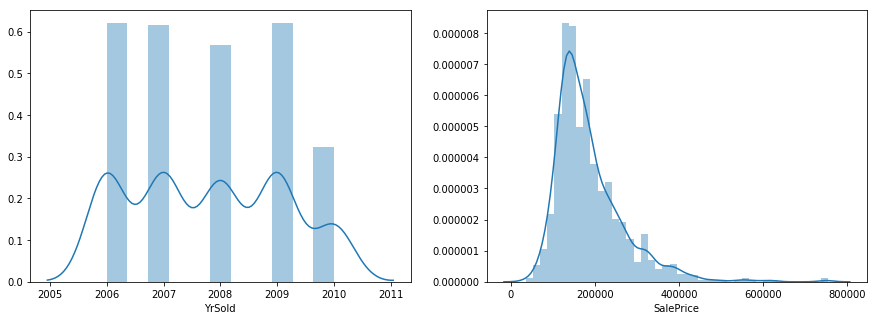

In [48]:
plt.figure(figsize=(15,5))
for i in range(35,37):
    plt.subplot(1, 2, i-34)
    plt.xticks(rotation=0)
    sns.distplot(df_housing[df_cont.columns[i]])

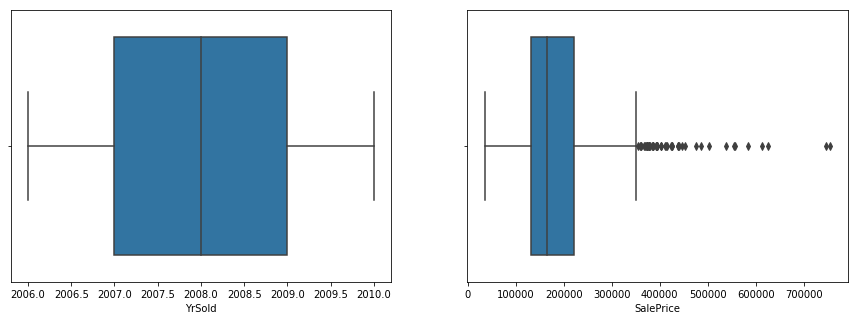

In [49]:
plt.figure(figsize=(15,5))
for i in range(35,37):
    plt.subplot(1, 2, i-34)
    plt.xticks(rotation=0)
    sns.boxplot(df_housing[df_cont.columns[i]])

# Univariate of categorical features

In [50]:
df_cat.describe().iloc[:3]

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
count      1094   1094     1094        1094      1094      1094         1094   
unique        5      2        4           4         5         3           25   
top          RL   Pave      Reg         Lvl    Inside       Gtl        NAmes   

       Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
count        1094       1094     1094       1094      1094     1094   
unique          9          6        5          8         5        7   
top          Norm       Norm     1Fam     1Story     Gable  CompShg   

       Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
count         1094        1094       1094      1094      1094       1094   
unique          14          16          4         4         4          5   
top        VinylSd     VinylSd       None        TA        TA      PConc   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1094     1094         1094         1094         1094    1094   
unique        4        4            4            6            6       4   
top          TA       TA           No          Unf          Unf    GasA   

       HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
count       1094       1094       1094        1094       1094       1094   
unique         5          2          5           4          6          6   
top           Ex          Y      SBrkr          TA        Typ     Attchd   

       GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
count          1094       1094       1094       1094     1094          1094  
unique            3          5          5          3        9             6  
top             Unf         TA         TA          Y       WD        Normal

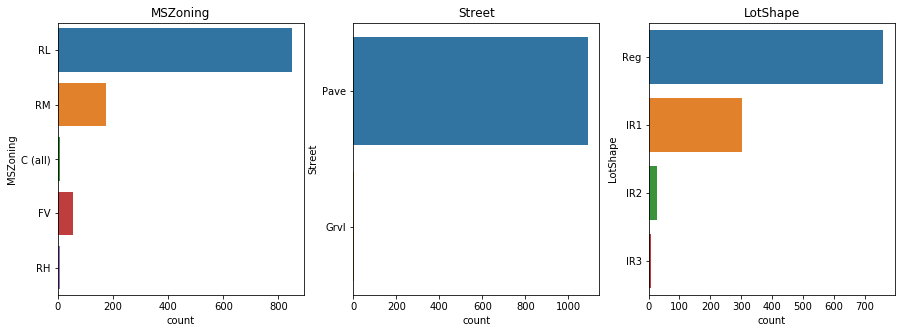

In [51]:
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

In [52]:
df_housing['Street'].value_counts()

Pave    1090
Grvl       4
Name: Street, dtype: int64

#### Since, almost all the values in "Street" column are of type "Pave" there is no need to use this column in Regression.

In [53]:
df_housing.drop(['Street'], axis =1)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None         0.0        TA   
1456  CompShg     Plywood     Plywood      Stone       119.0        TA   
1457  CompShg     CemntBd     CmentBd       None         0.0        Ex   
1458  CompShg     MetalSd     MetalSd       None         0.0        TA   
1459  CompShg     HdBoard     HdBoard       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av     

In [54]:
df_cat.describe().iloc[3:6]

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
freq      850   1090      760         991       830      1045          173   

     Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
freq        950       1082      925        540       843     1078         421   

     Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
freq         412        639       646       973        518      486     1006   

     BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
freq          734          343          972    1075       594       1036   

     Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
freq       1009         528       1024        680          485       1031   

     GarageCond PavedDrive SaleType SaleCondition  
freq       1050       1023      928           880

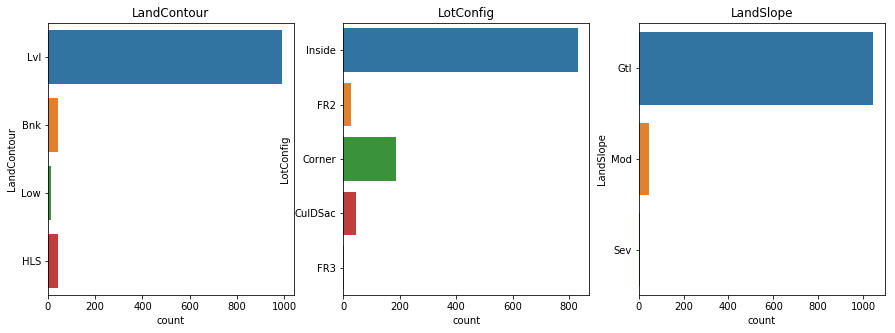

In [55]:
plt.figure(figsize=(15,5))
for i in range(3,6):
    plt.subplot(1, 3, i-2)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

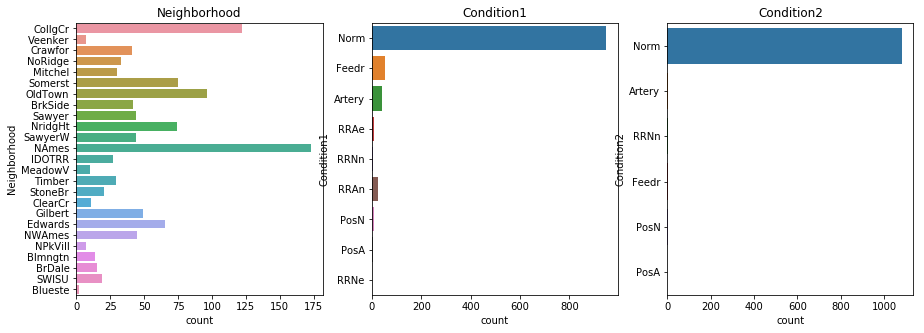

In [56]:
plt.figure(figsize=(15,5))
for i in range(6,9):
    plt.subplot(1, 3, i-5)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

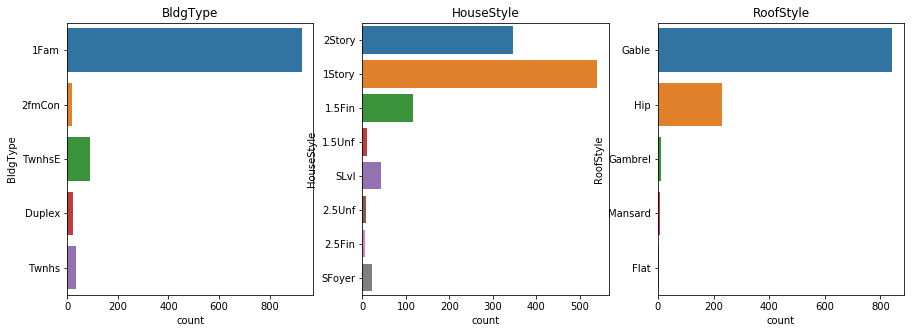

In [57]:
plt.figure(figsize=(15,5))
for i in range(9,12):
    plt.subplot(1, 3, i-8)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

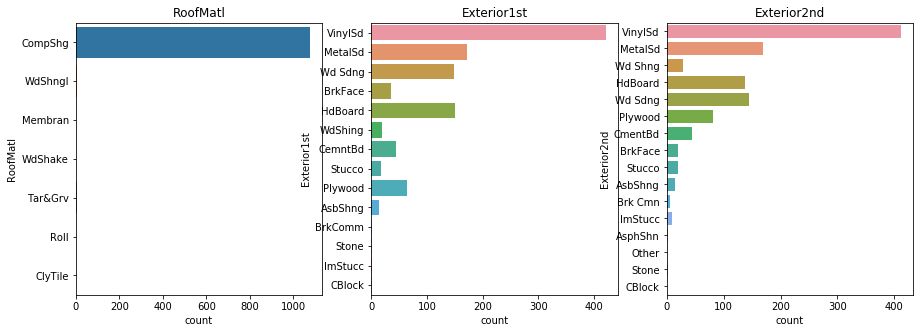

In [58]:
plt.figure(figsize=(15,5))
for i in range(12,15):
    plt.subplot(1, 3, i-11)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

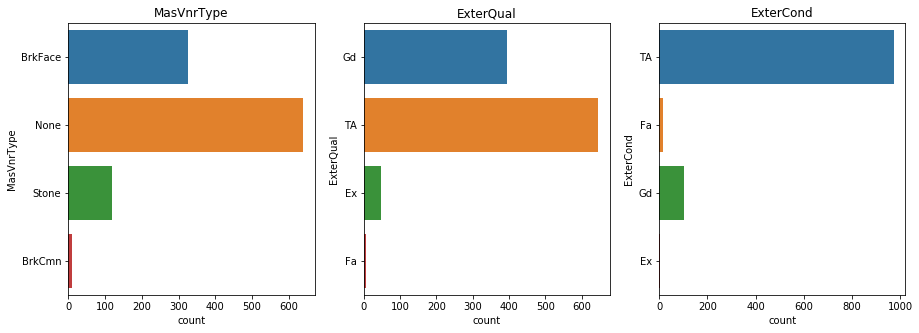

In [59]:
plt.figure(figsize=(15,5))
for i in range(15,18):
    plt.subplot(1, 3, i-14)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

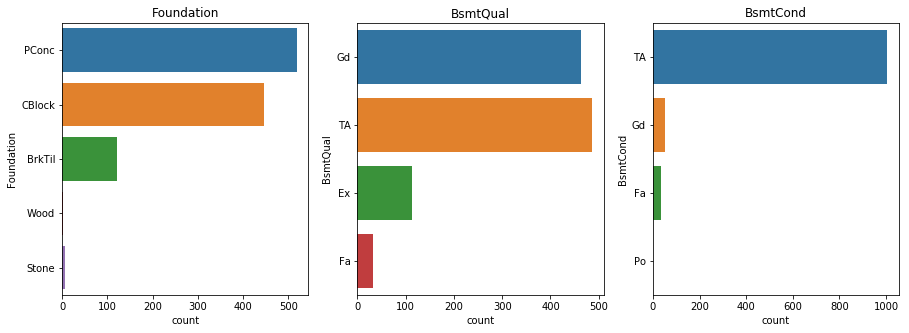

In [60]:
plt.figure(figsize=(15,5))
for i in range(18,21):
    plt.subplot(1, 3, i-17)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

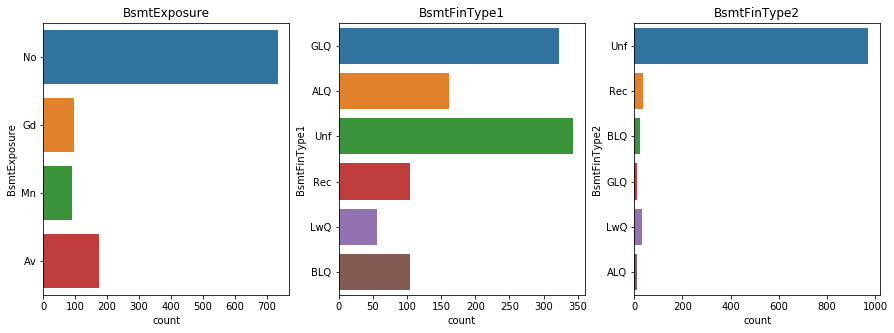

In [61]:
plt.figure(figsize=(15,5))
for i in range(21,24):
    plt.subplot(1, 3, i-20)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

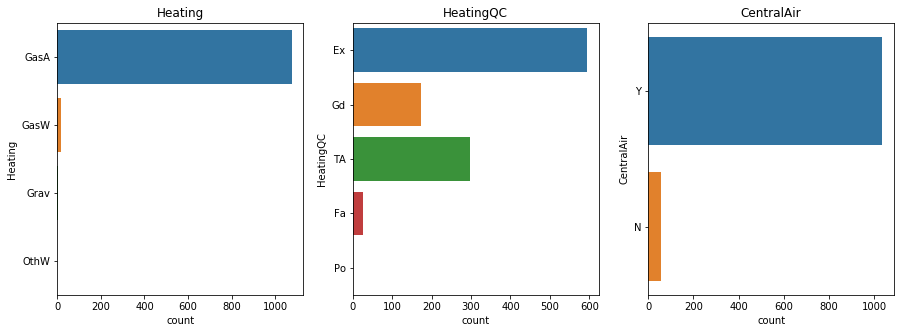

In [62]:
plt.figure(figsize=(15,5))
for i in range(24,27):
    plt.subplot(1, 3, i-23)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

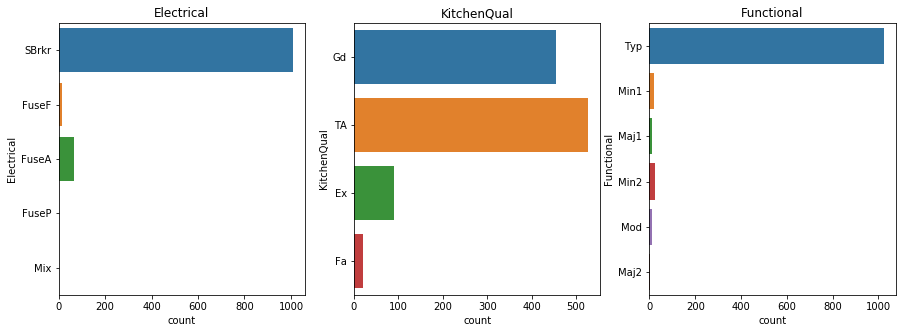

In [63]:
plt.figure(figsize=(15,5))
for i in range(27,30):
    plt.subplot(1, 3, i-26)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

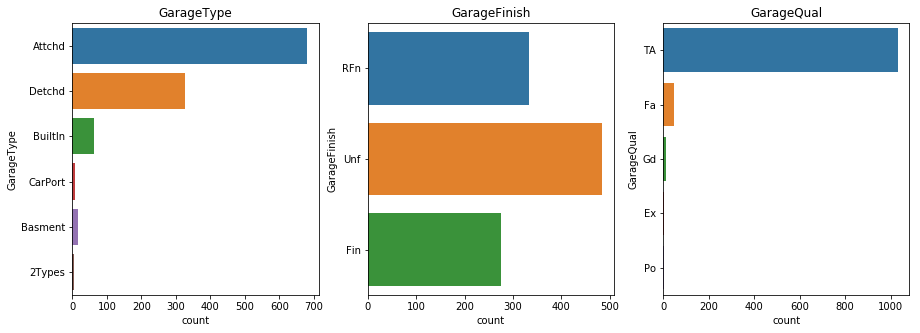

In [64]:
plt.figure(figsize=(15,5))
for i in range(30,33):
    plt.subplot(1, 3, i-29)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

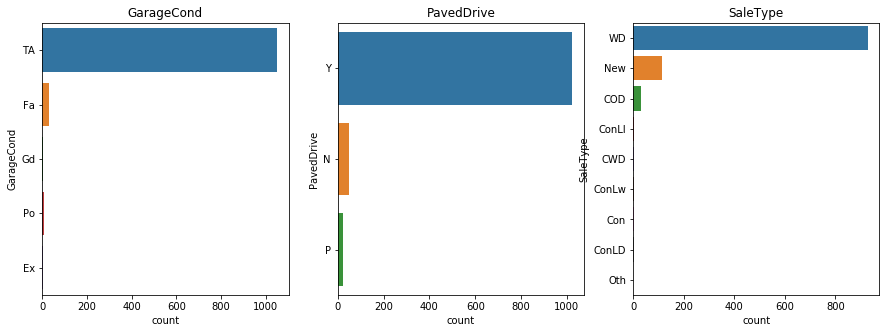

In [65]:
plt.figure(figsize=(15,5))
for i in range(33,36):
    plt.subplot(1, 3, i-32)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

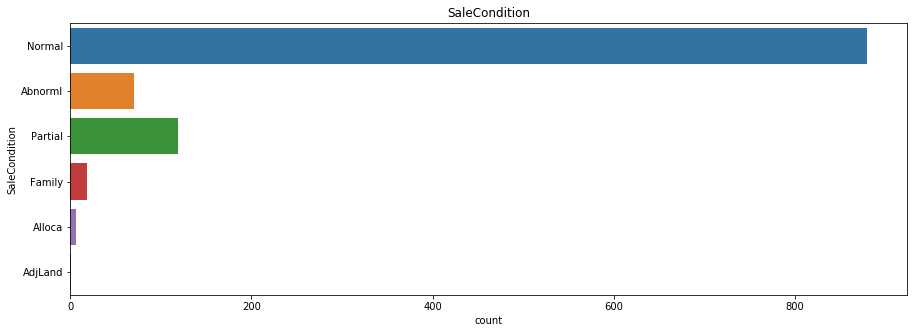

In [66]:
plt.figure(figsize=(15,5))
for i in range(36,37):
    plt.subplot(1, 1, i-35)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

# Bi-variate analysis with dependent variables

## Categorical and continious(dependent(SalsePrice))

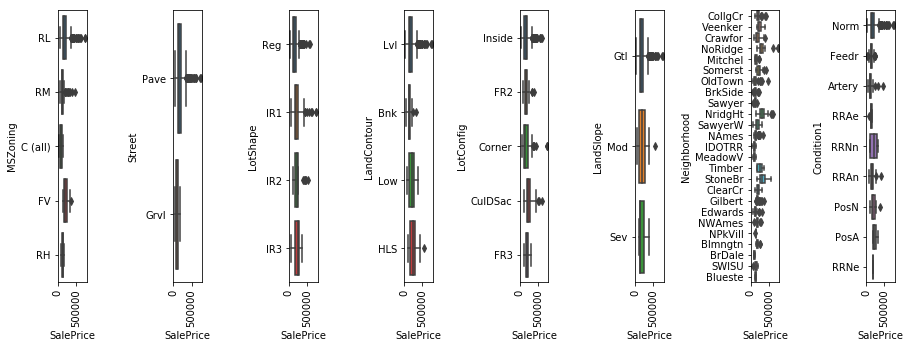

In [69]:
plt.figure(figsize=(15,5))
for i in range(0,8):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df_housing[df_cat.columns[i]],x=df_housing['SalePrice'],data=df_housing)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

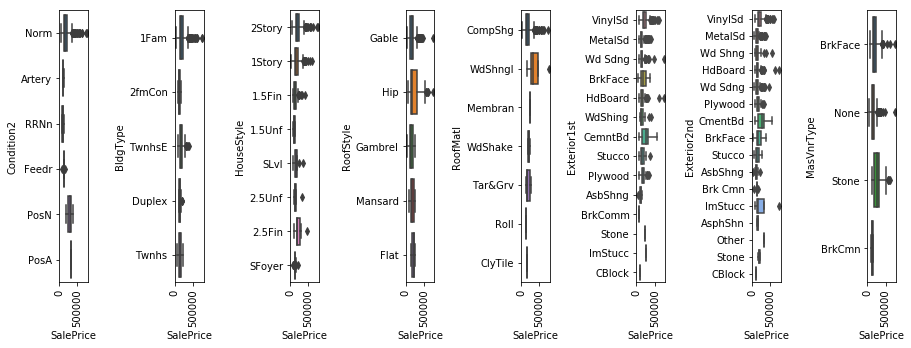

In [70]:
plt.figure(figsize=(15,5))
for i in range(8,16):
    plt.subplot(1, 8, i-7)
    sns.boxplot(y=df_housing[df_cat.columns[i]],x=df_housing['SalePrice'],data=df_housing)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

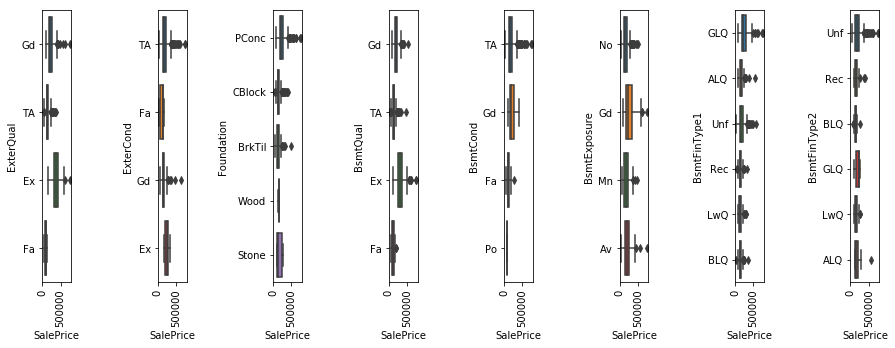

In [71]:
plt.figure(figsize=(15,5))
for i in range(16,24):
    plt.subplot(1, 8, i-15)
    sns.boxplot(y=df_housing[df_cat.columns[i]],x=df_housing['SalePrice'],data=df_housing)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

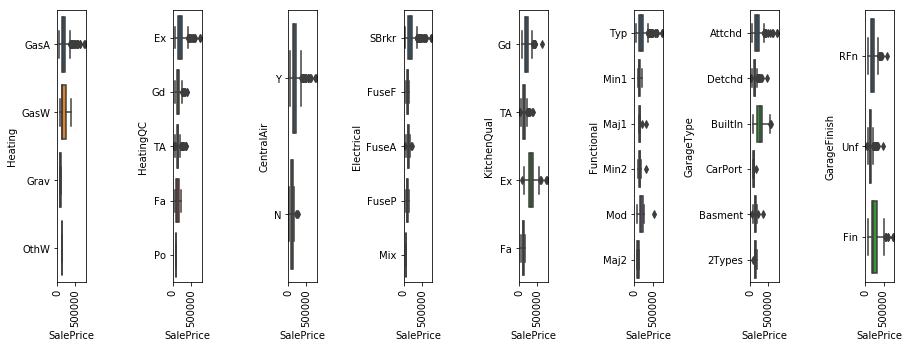

In [72]:
plt.figure(figsize=(15,5))
for i in range(24,32):
    plt.subplot(1, 8, i-23)
    sns.boxplot(y=df_housing[df_cat.columns[i]],x=df_housing['SalePrice'],data=df_housing)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

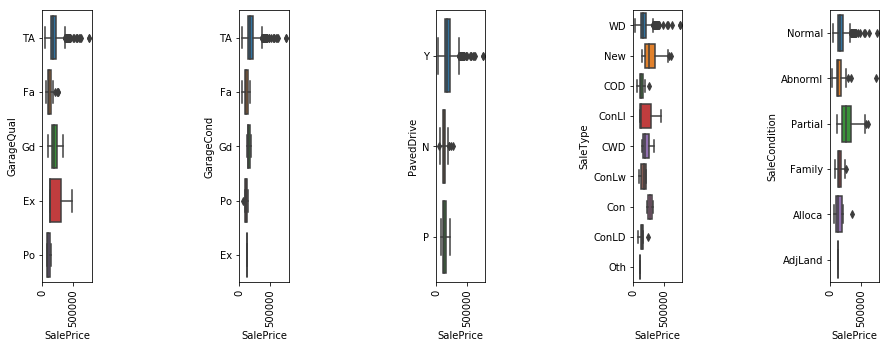

In [73]:
plt.figure(figsize=(15,5))
for i in range(32,37):
    plt.subplot(1, 5, i-31)
    sns.boxplot(y=df_housing[df_cat.columns[i]],x=df_housing['SalePrice'],data=df_housing)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

# Bi variate with continious and continious

<Figure size 2304x1584 with 0 Axes>

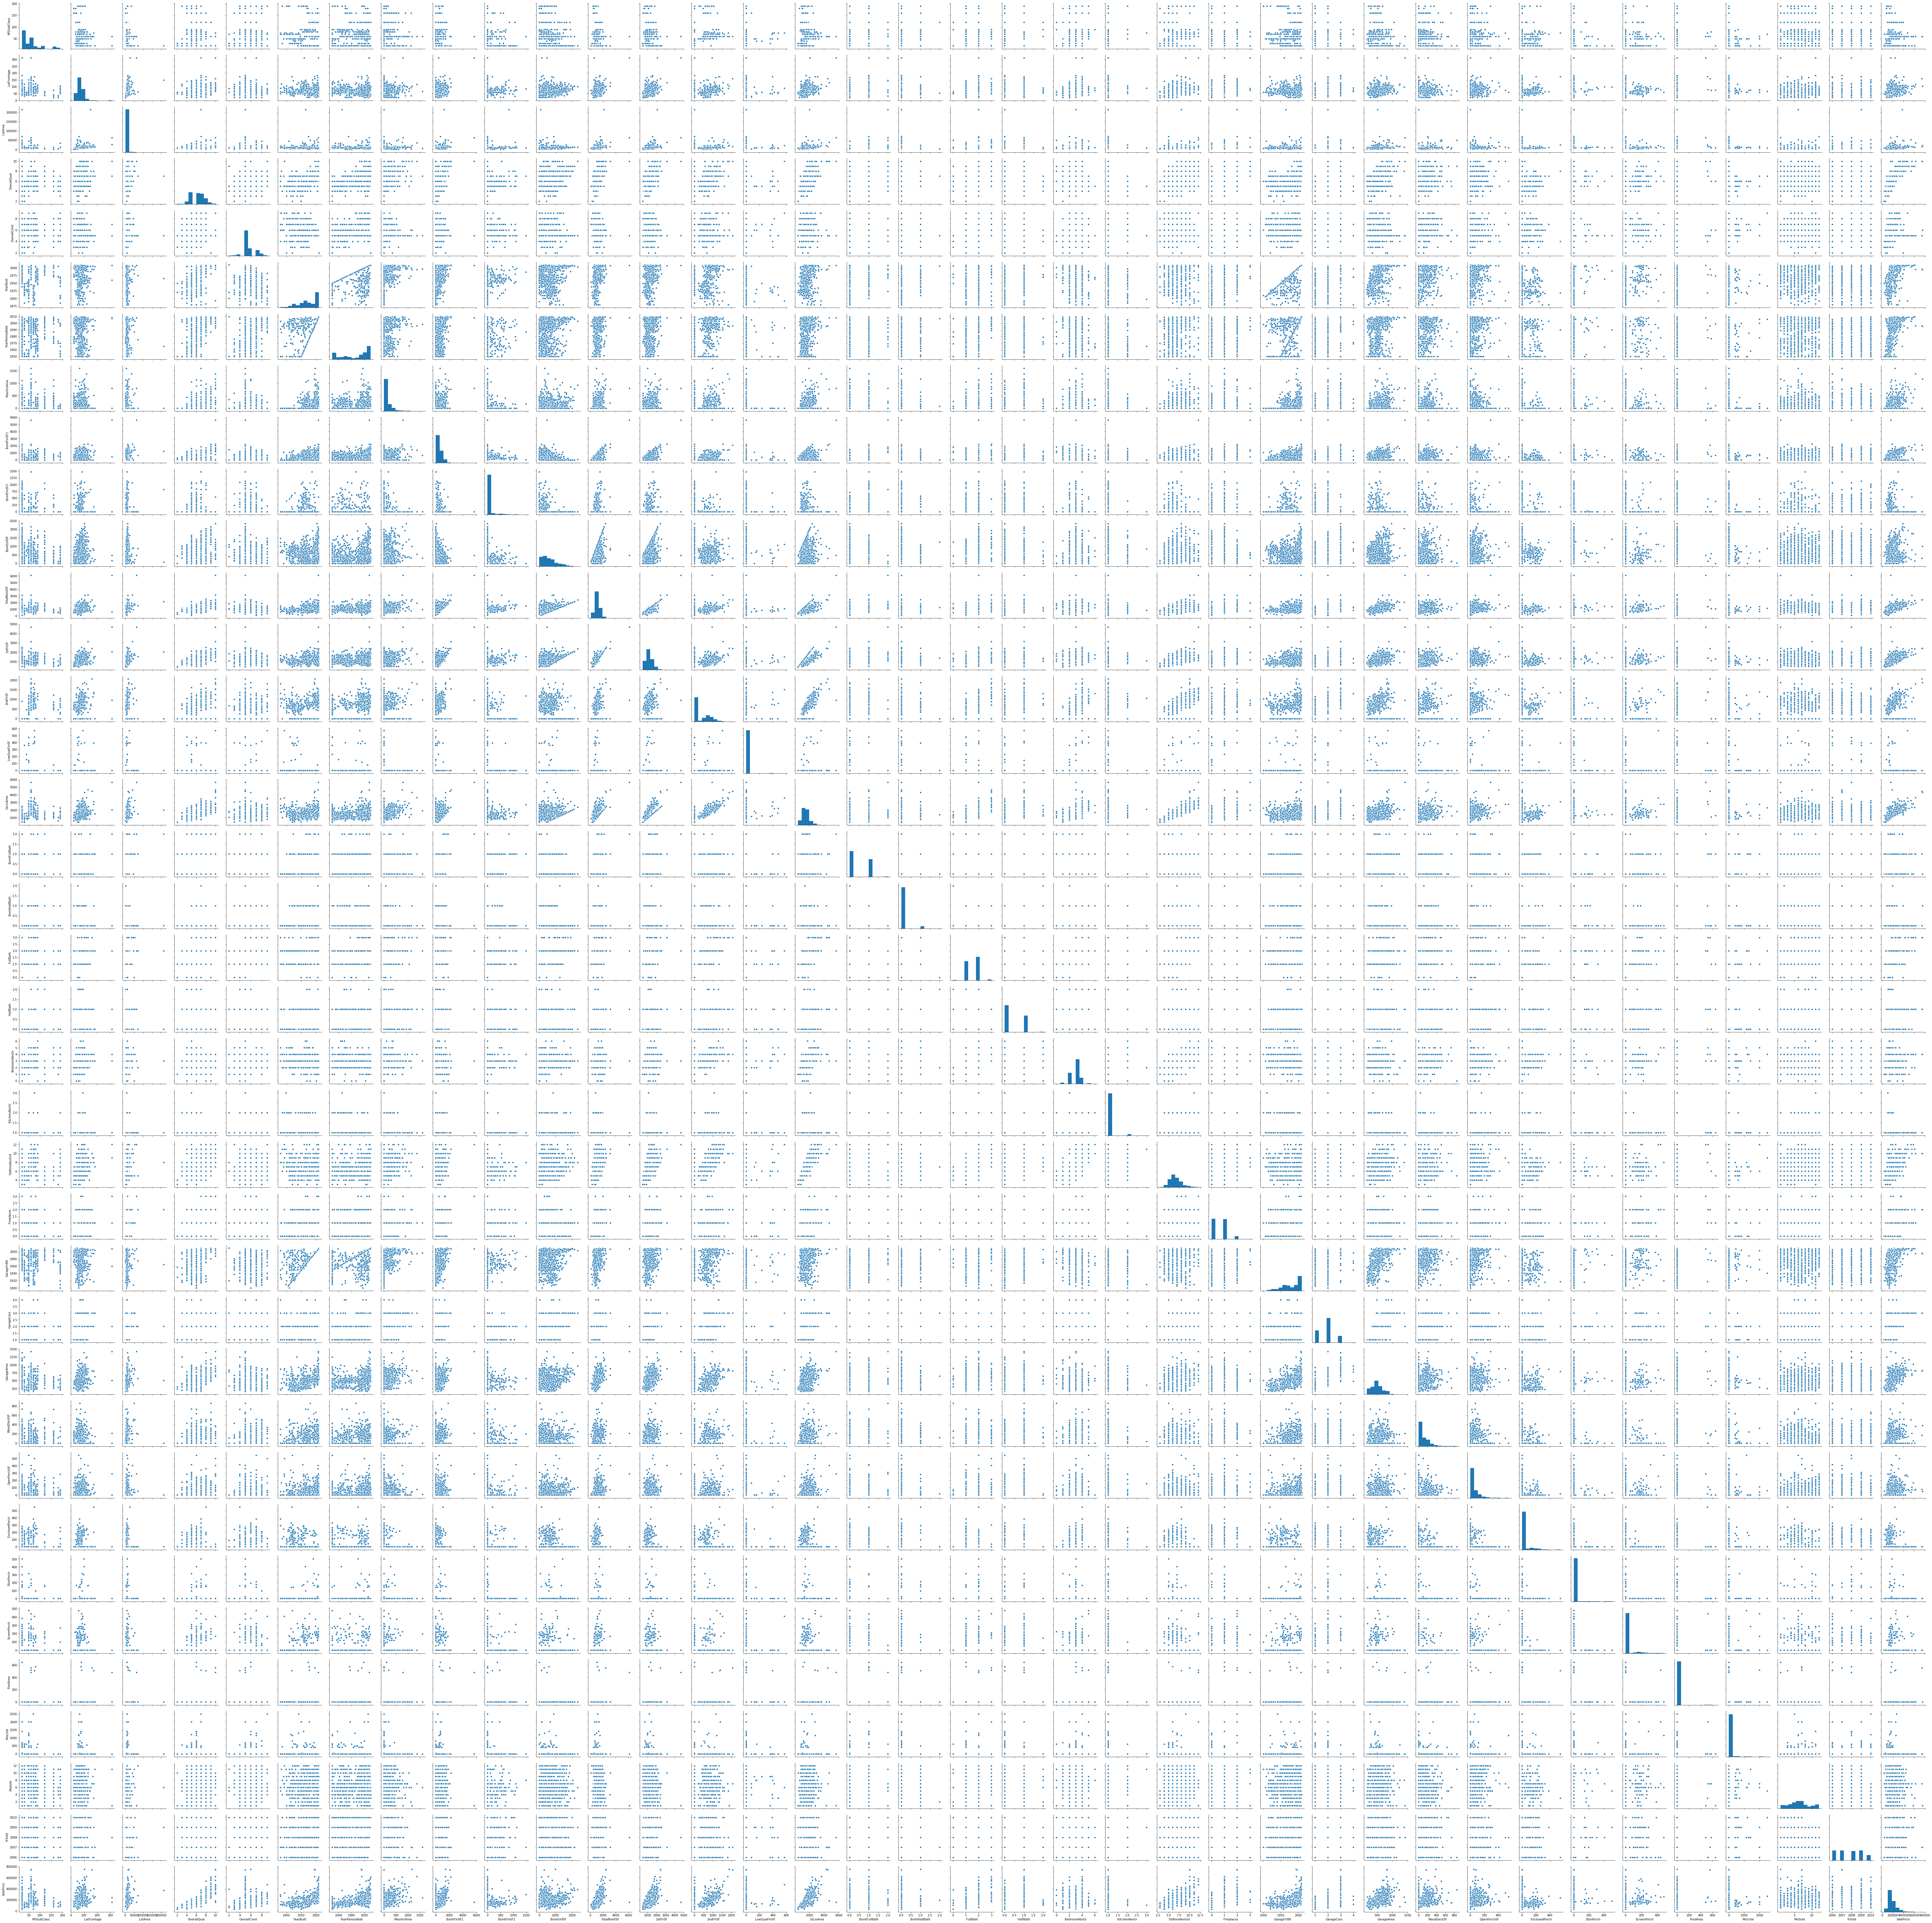

In [74]:
plt.figure(figsize=(32, 22))
sns.pairplot(df_cont)
plt.show()

In [ ]:
df_cont.corr()

In [ ]:
plt.figure(figsize=(32, 22))
sns.heatmap(df_cont.corr(),annot=True)

In [ ]:
df_housing.head()

In [34]:
df_housing[['YearBuilt','YearRemodAdd']].corr()

YearBuilt  YearRemodAdd
YearBuilt      1.000000      0.625905
YearRemodAdd   0.625905      1.000000

In [35]:
## We can drop 'YearRemodAdd' its highly co-related to YearBuilt
df_housing = df_housing.drop('YearRemodAdd',axis=1)

In [40]:
df_housing[['MoSold','YrSold']].corr()

MoSold    YrSold
MoSold  1.000000 -0.152046
YrSold -0.152046  1.000000

In [41]:
df_housing[['OverallQual','OverallCond']].corr()

OverallQual  OverallCond
OverallQual     1.000000    -0.189587
OverallCond    -0.189587     1.000000

In [42]:
df_cat.head()

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      Reg         Lvl    Inside       Gtl      CollgCr   
1       RL   Pave      Reg         Lvl       FR2       Gtl      Veenker   
2       RL   Pave      IR1         Lvl    Inside       Gtl      CollgCr   
3       RL   Pave      IR1         Lvl    Corner       Gtl      Crawfor   
4       RL   Pave      IR1         Lvl       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1     MetalSd       None        TA        TA     CBlock       Gd       TA   
2     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3     Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [43]:
dummies = pd.get_dummies(df_cat, drop_first=True)
dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0 

In [44]:
categorical_cols = list(df_cat.columns)

In [45]:
df_housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [46]:
df_housing.drop(categorical_cols,inplace = True, axis=1)

In [47]:
df_housing.shape

(1094, 36)

In [48]:
#df_final = pd.concat([df_sales,df_cat],axis=1)
#df_final.head()

df_final = pd.concat([df_housing, dummies], axis = 1)
df_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  Electrical_SBrkr  \
0  12.247694            0            0            1  ...                 1   
1  12.109011            0            0            1  ...                 1   
2  12.317167            0            0            1  ...                 1   
3  11.849398            0            0            1  ...                 1   
4  12.429216            0            0            1  ...                 1   

   KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  \
0               0               1               0                0   
1               0               0               1                0   
2               0               1               0                0   
3               0               1               0                0   
4               0               1               0                0   

   Functional_Min1  Functional_Min2  Functional_Mod  Functional_Typ  \
0                0                0               0               1   
1                0                0               0               1   
2                0                0               0               1   
3                0                0               0               1   
4                0                0               0               1   

   GarageType_At

In [49]:
df_final.shape

(1094, 221)

In [50]:
y = df_final.pop('SalePrice')
X = df_final

In [51]:
df_cont.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Remove SalePrice from the numeric columns list 

In [52]:
numeric_cols =  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [54]:
print(X_train.shape)
print(X_test.shape)

(765, 220)
(329, 220)


In [55]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
290           60        120.0    15611            8            5       2006   
546           50         70.0     8737            6            7       1923   
891           60         70.0    11184            6            5       1978   
1393         190         60.0    10800            6            7       1905   
605           60         85.0    13600            7            6       1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
290          0.0           0           0       1079         1079      1079   
546          0.0         300           0        765         1065       915   
891         92.0         226         500        192          918       918   
1393         0.0           0           0        482          482      1221   
605        176.0         454           0        314          768      1186   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
290        840             0       1919             0             0         2   
546        720             0       1635             0             0         1   
891        765             0       1683             0             0         2   
1393       691             0       1912             0             0         2   
605        800             0       1986             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
290          1             3             1             8           1   
546          1             3             1             6           1   
891          1             3             1             7           1   
1393         0             3             2             7           1   
605          1             3             1             7           3   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
290        2006.0           2         685           0           51   
546        1950.0           2         440           0           38   
891        1978.0           2         440         243            0   
1393       2003.0           2         672           0           25   
605        1965.0           2         486           0           42   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
290               0          0            0         0        0       7   
546               0        144            0         0        0       5   
891               0          0            0         0        0       7   
1393            212          0            0         0        0       4   
605               0          0          189         0        0      10   

      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  ...  \
290     2006            0            0            1            0  ...   
546     2007            0            0            1            0  ...   
891     2009            0            0            1            0  ...   
1393    2008            0            0            0            1  ...   
605     2009            0            0            1            0  ...   

      Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
290                  1               0               1               0   
546                  0               0               0               1   
891                  1               0               0               1   
1393                 1               0               0               1   
605                  1               0               0               1   

      Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
290                 0                0                0               0   
546                 0                0                0               0   
891                 0                0                0               0   
1393                0                0                0               0   
605              

In [56]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
202           50         50.0     7000            6            6       1924   
1125          20         60.0    10434            4            5       1955   
219          120         43.0     3010            7            5       2005   
1333          50         60.0     7200            5            6       1938   
400          120         38.0    14963            8            5       1996   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
202          0.0         617           0          0          617       865   
1125         0.0           0           0       1005         1005      1005   
219         16.0          16           0       1232         1248      1248   
1333         0.0           0           0        803          803       803   
400          0.0         786           0        474         1260      1288   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
202        445             0       1310             0             0         2   
1125         0             0       1005             0             0         1   
219          0             0       1248             0             0         2   
1333       557             0       1360             0             0         1   
400          0             0       1288             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
202          0             2             1             6           0   
1125         0             2             1             5           1   
219          0             2             1             5           0   
1333         1             2             1             6           0   
400          1             1             1             4           2   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
202        1924.0           1         398           0            0   
1125       1977.0           2         672           0            0   
219        2005.0           2         438         108            0   
1333       1951.0           1         297           0           65   
400        1996.0           2         500         120           30   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
202             126          0            0         0        0       5   
1125              0          0            0         0        0      11   
219               0          0            0         0        0       3   
1333            190          0            0         0        0       7   
400               0          0          224         0        0      12   

      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  ...  \
202     2006            0            0            1            0  ...   
1125    2009            0            0            1            0  ...   
219     2006            0            0            1            0  ...   
1333    2006            0            0            0            1  ...   
400     2008            0            0            1            0  ...   

      Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
202                  1               0               0               1   
1125                 1               1               0               0   
219                  1               0               1               0   
1333                 1               0               1               0   
400                  1               0               0               0   

      Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
202                 0                1                0               0   
1125                0                0                0               0   
219                 0                0                0               0   
1333                0                0                0               0   
400              

### Scaling the feature


To be able to interpret the results in a better way, we need to scale the numerical features.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [58]:
X_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  765.000000   765.000000  765.000000   765.000000   765.000000   
mean     0.206075     0.174752    0.041673     0.531046     0.509804   
std      0.241607     0.086750    0.041405     0.166211     0.152765   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.133562    0.030382     0.375000     0.428571   
50%      0.176471     0.167808    0.038753     0.500000     0.428571   
75%      0.235294     0.208904    0.047250     0.625000     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count  765.000000  765.000000  765.000000  765.000000  765.000000   
mean     0.712207    0.078660    0.079310    0.034785    0.259457   
std      0.236517    0.131917    0.083904    0.115273    0.190669   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.569231    0.000000    0.000000    0.000000    0.115582   
50%      0.723077    0.000000    0.068746    0.000000    0.217466   
75%      0.946154    0.124093    0.124734    0.000000    0.362158   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  \
count   765.000000  765.000000  765.000000    765.000000  765.000000   
mean      0.166526    0.174573    0.171419      0.005089    0.211285   
std       0.070371    0.091066    0.211262      0.060029    0.099664   
min       0.000000    0.000000    0.000000      0.000000    0.000000   
25%       0.119400    0.107193    0.000000      0.000000    0.141814   
50%       0.153372    0.156794    0.000000      0.000000    0.203305   
75%       0.207327    0.229431    0.353027      0.000000    0.258647   
max       1.000000    1.000000    1.000000      1.000000    1.000000   

       BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  \
count    765.000000    765.000000  765.000000  765.000000    765.000000   
mean       0.210458      0.054902    0.525054    0.198693      0.477996   
std        0.256120      0.227938    0.177619    0.251432      0.127008   
min        0.000000      0.000000    0.000000    0.000000      0.000000   
25%        0.000000      0.000000    0.333333    0.000000      0.333333   
50%        0.000000      0.000000    0.666667    0.000000      0.500000   
75%        0.500000      0.000000    0.666667    0.500000      0.500000   
max        1.000000      1.000000    1.000000    1.000000      1.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    765.000000    765.000000  765.000000   765.000000  765.000000   
mean       0.018301      0.396369    0.206972     0.682863    0.293246   
std        0.097372      0.169302    0.210979     0.257779    0.216044   
min        0.000000      0.000000    0.000000     0.000000    0.000000   
25%        0.000000      0.333333    0.000000     0.500000    0.000000   
50%        0.000000      0.333333    0.333333     0.700000    0.333333   
75%        0.000000      0.444444    0.333333     0.930000    0.333333   
max        1.000000      1.000000    1.000000     1.000000    1.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count  765.000000  765.000000   765.000000     765.000000  765.000000   
mean     0.274237    0.125426     0.087551       0.072368    0.006479   
std      0.152731    0.159077     0.120846       0.198788    0.058812   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.166932    0.000000     0.000000       0.000000    0.000000   
50%      0.257552    0.000000     0.053016       0.000000    0.000000   
75%      0.340223    0.230769     0.126143       0.000000    0.000000   
max      1.000000    1.000000     1.000000       1.000000    1.000000   

       ScreenPorch    PoolArea     MiscVal      MoSold      YrSold  \
count   765.0000

## Scale test variables

test and train variables should be on the same scale

In [101]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [102]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
202     0.176471     0.099315  0.026642        0.500     0.571429   0.338462   
1125    0.000000     0.133562  0.042693        0.250     0.428571   0.576923   
219     0.588235     0.075342  0.007993        0.625     0.428571   0.961538   
1333    0.176471     0.133562  0.027577        0.375     0.571429   0.446154   
400     0.588235     0.058219  0.063862        0.750     0.428571   0.892308   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
202     0.000000    0.109320         0.0   0.000000     0.085262  0.100376   
1125    0.000000    0.000000         0.0   0.430223     0.149875  0.133286   
219     0.011611    0.002835         0.0   0.527397     0.190341  0.190409   
1333    0.000000    0.000000         0.0   0.343750     0.116236  0.085802   
400     0.000000    0.139263         0.0   0.202911     0.192340  0.199812   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
202   0.215496           0.0   0.167563           0.0           0.0  0.666667   
1125  0.000000           0.0   0.108955           0.0           0.0  0.333333   
219   0.000000           0.0   0.155650           0.0           0.0  0.666667   
1333  0.269734           0.0   0.177171           0.0           0.0  0.333333   
400   0.000000           0.0   0.163336           0.5           0.0  0.333333   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
202        0.0      0.333333           0.0      0.333333    0.000000   
1125       0.0      0.333333           0.0      0.222222    0.333333   
219        0.0      0.333333           0.0      0.222222    0.000000   
1333       0.5      0.333333           0.0      0.333333    0.000000   
400        0.5      0.166667           0.0      0.111111    0.666667   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
202          0.14    0.000000    0.189189    0.000000     0.000000   
1125         0.67    0.333333    0.406995    0.000000     0.000000   
219          0.95    0.333333    0.220986    0.148352     0.000000   
1333         0.41    0.000000    0.108903    0.000000     0.118830   
400          0.86    0.333333    0.270270    0.164835     0.054845   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
202        0.430034        0.0     0.000000       0.0      0.0  0.363636   
1125       0.000000        0.0     0.000000       0.0      0.0  0.909091   
219        0.000000        0.0     0.000000       0.0      0.0  0.181818   
1333       0.648464        0.0     0.000000       0.0      0.0  0.545455   
400        0.000000        0.0     0.466667       0.0      0.0  1.000000   

      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  ...  \
202     0.00            0            0            1            0  ...   
1125    0.75            0            0            1            0  ...   
219     0.00            0            0            1            0  ...   
1333    0.00            0            0            0            1  ...   
400     0.50            0            0            1            0  ...   

      Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
202                  1               0               0               1   
1125                 1               1               0               0   
219                  1               0               1               0   
1333                 1               0               1               0   
400                  1               0               0               0   

      Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  \
202                 0                1                0               0   
1125                0                0                0               0   
219                 0                0                0               0   
1333                0                0                0               0   

In [103]:
X_test.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  329.000000   329.000000  329.000000   329.000000   329.000000   
mean     0.227517     0.160314    0.040377     0.530775     0.513244   
std      0.258608     0.076164    0.030255     0.181439     0.151610   
min      0.000000     0.000000    0.001384     0.000000     0.142857   
25%      0.000000     0.109589    0.027577     0.375000     0.428571   
50%      0.176471     0.157534    0.036551     0.500000     0.428571   
75%      0.294118     0.202055    0.046498     0.625000     0.571429   
max      1.000000     0.523973    0.324668     1.000000     1.000000   

        YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count  329.000000  329.000000  329.000000  329.000000  329.000000   
mean     0.707739    0.082188    0.079645    0.021202    0.259493   
std      0.247994    0.152492    0.081150    0.087924    0.191574   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.553846    0.000000    0.000000    0.000000    0.117295   
50%      0.738462    0.000000    0.066265    0.000000    0.238014   
75%      0.946154    0.127721    0.129695    0.000000    0.362158   
max      0.992308    1.161103    0.400425    0.721167    0.921661   

       TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  \
count   329.000000  329.000000  329.000000    329.000000  329.000000   
mean      0.163521    0.169239    0.175535      0.015378    0.209688   
std       0.066631    0.091317    0.216358      0.097897    0.104509   
min       0.026478    0.009873    0.000000      0.000000    0.008071   
25%       0.116403    0.103667    0.000000      0.000000    0.135281   
50%       0.147710    0.152327    0.000000      0.000000    0.191007   
75%       0.201665    0.226610    0.354479      0.000000    0.254804   
max       0.505079    0.634697    0.880387      0.840909    0.814374   

       BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  \
count    329.000000    329.000000  329.000000  329.000000    329.000000   
mean       0.214286      0.060790    0.527862    0.185410      0.474671   
std        0.259824      0.251727    0.196472    0.248102      0.128310   
min        0.000000      0.000000    0.000000    0.000000      0.000000   
25%        0.000000      0.000000    0.333333    0.000000      0.333333   
50%        0.000000      0.000000    0.666667    0.000000      0.500000   
75%        0.500000      0.000000    0.666667    0.500000      0.500000   
max        1.000000      2.000000    1.000000    1.000000      1.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    329.000000    329.000000  329.000000   329.000000  329.000000   
mean       0.013678      0.397501    0.195542     0.692158    0.292806   
std        0.081683      0.191103    0.211285     0.263230    0.227762   
min        0.000000      0.000000    0.000000    -0.100000    0.000000   
25%        0.000000      0.222222    0.000000     0.500000    0.000000   
50%        0.000000      0.333333    0.333333     0.780000    0.333333   
75%        0.000000      0.444444    0.333333     0.930000    0.333333   
max        0.500000      1.000000    0.666667     0.990000    1.000000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count  329.000000  329.000000   329.000000     329.000000  329.000000   
mean     0.270988    0.139275     0.081817       0.082005    0.006318   
std      0.153273    0.188328     0.112938       0.234604    0.057445   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.141494    0.000000     0.000000       0.000000    0.000000   
50%      0.257552    0.000000     0.042048       0.000000    0.000000   
75%      0.363275    0.247253     0.124314       0.000000    0.000000   
max      0.709062    1.177198     0.742230       1.883959    0.801181   

       ScreenPorch    PoolArea     MiscVal      MoSold      YrSold  \
count   329.0000

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [62]:

ridge = Ridge()
from sklearn.feature_selection import RFE
rfe = RFE(ridge, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 10),
 ('LotFrontage', False, 42),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 113),
 ('BsmtFinSF1', False, 177),
 ('BsmtFinSF2', False, 93),
 ('BsmtUnfSF', False, 76),
 ('TotalBsmtSF', False, 57),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 77),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 151),
 ('FullBath', True, 1),
 ('HalfBath', False, 59),
 ('BedroomAbvGr', False, 99),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 16),
 ('GarageYrBlt', False, 6),
 ('GarageCars', True, 1),
 ('GarageArea', False, 172),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 119),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 141),
 ('MoSold', False, 184),
 ('YrSold', False, 130),
 ('MSZoning_FV', False, 21),
 ('MSZoning_RH', False

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageCars', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'Street_Pave', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr',
       'BldgType_Twnhs', 'RoofMatl_CompShg', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Functional_Maj2'],
      dtype='object')

# Ridge

In [122]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,2.0, 3.0,4.0, 
  5.0, 6.0, 7.0, 8.0, 9.0,10.0]}


ridge = Ridge()

# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train)

Fitting 7 folds for each of 23 candidates, totalling 161 fits


[Parallel(n_jobs=1)]: Done 161 out of 161 | elapsed:    0.9s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.005955      0.003330         0.000143        0.000350      0.0001   
1        0.006388      0.003840         0.000000        0.000000       0.001   
2        0.002138      0.003696         0.001093        0.001903        0.01   
3        0.003192      0.004130         0.000143        0.000349        0.05   
4        0.002424      0.000980         0.001861        0.001904         0.1   
5        0.003797      0.003302         0.000432        0.000739         0.2   
6        0.004775      0.002769         0.000280        0.000443         0.3   
7        0.003175      0.002780         0.000143        0.000350         0.4   
8        0.003959      0.003660         0.000379        0.000722         0.5   
9        0.004412      0.003831         0.000143        0.000350         0.6   
10       0.003635      0.002799         0.000439        0.000749         0.7   
11       0.003877      0.002983         0.000721        0.001399         0.8   
12       0.003214      0.001880         0.000792        0.000756         0.9   
13       0.002006      0.001379         0.000288        0.000456           1   
14       0.004727      0.003546         0.000286        0.000451           2   
15       0.004615      0.004101         0.000576        0.000734           3   
16       0.003171      0.003918         0.000288        0.000705           4   
17       0.004185      0.004158         0.000000        0.000000           5   
18       0.003262      0.002907         0.000143        0.000350           6   
19       0.003886      0.004519         0.000143        0.000351           7   
20       0.001302      0.001230         0.002315        0.003351           8   
21       0.004219      0.004198         0.000581        0.000739           9   
22       0.003740      0.004373         0.001149        0.002814          10   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.102176          -0.092646   
1    {'alpha': 0.001}          -0.102166          -0.092604   
2     {'alpha': 0.01}          -0.102123          -0.092203   
3     {'alpha': 0.05}          -0.102041          -0.092151   
4      {'alpha': 0.1}          -0.102156          -0.092512   
5      {'alpha': 0.2}          -0.102455          -0.092775   
6      {'alpha': 0.3}          -0.102748          -0.092806   
7      {'alpha': 0.4}          -0.103074          -0.092717   
8      {'alpha': 0.5}          -0.103398          -0.092575   
9      {'alpha': 0.6}          -0.103672          -0.092408   
10     {'alpha': 0.7}          -0.103894          -0.092255   
11     {'alpha': 0.8}          -0.104083          -0.092129   
12     {'alpha': 0.9}          -0.104313          -0.092002   
13     {'alpha': 1.0}          -0.104513          -0.091877   
14     {'alpha': 2.0}          -0.106261          -0.091207   
15     {'alpha': 3.0}          -0.107801          -0.091469   
16     {'alpha': 4.0}          -0.109023          -0.091847   
17     {'alpha': 5.0}          -0.110273          -0.092130   
18     {'alpha': 6.0}          -0.111535          -0.093048   
19     {'alpha': 7.0}          -0.112740          -0.094198   
20     {'alpha': 8.0}          -0.113891          -0.095326   
21     {'alpha': 9.0}          -0.115025          -0.096484   
22    {'alpha': 10.0}          -0.116140          -0.097728   

    split2_test_score  split3_test_score  split4_test_score  \
0           -0.084969          -0.085394          -0.112722   
1           -0.084982          -0.085418          -0.112725   
2           -0.085083          -0.085637          -0.112725   
3           -0.085335          -0.086447          -0.112913   
4           -0.085559          -0.087261          -0.113006   
5           -0.085893          -0.088566          -0.112958   
6           -0.086113          -0.089690          -0.112809   
7           -0.086266          -0.090658          -0.112695   
8  

In [124]:
model_cv.best_params_

{'alpha': 0.2}

In [125]:
model_cv.best_score_

-0.09955707940263775

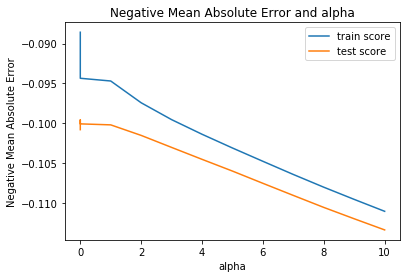

In [126]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [127]:
#Now, Lets create the final Ridge Model
ridge = Ridge(alpha=0.2)
final_ridge_model = ridge.fit(X_train[col], y_train)

#### RSquared values for final Ridge Model

In [128]:
print('Rsq for train set  : {0}'.format(final_ridge_model.score(X_train[col],y_train)))
print('Rsq for test set : {0}'.format(final_ridge_model.score(X_test[col],y_test)))


Rsq for train set  : 0.8907353738811468
Rsq for test set : 0.8364693822491521


In [165]:
final_ridge_model.coef_

array([ 0.58703795,  0.65327371,  0.34231451,  0.44504924,  0.71937727,
        0.15215174,  0.69795075,  0.15938629,  0.0844397 , -0.31777034,
        0.148243  ,  0.21326623,  0.1263704 ,  0.16706279,  0.13550124,
       -0.1979285 ,  0.28386155, -0.22879807,  0.16391562, -0.15649594,
        0.08035732,  0.14706065, -0.1430341 ,  0.70214179,  0.62581265,
        0.58650195,  0.69248675, -0.48753621, -0.24687608, -0.17558808])

In [173]:
list(zip(X_train[col].columns,final_ridge_model.coef_))

[('LotArea', 0.5870379511311196),
 ('OverallQual', 0.6532737053703656),
 ('OverallCond', 0.3423145081786368),
 ('YearBuilt', 0.4450492426874496),
 ('1stFlrSF', 0.7193772672734718),
 ('2ndFlrSF', 0.15215173711629623),
 ('GrLivArea', 0.6979507514417636),
 ('BsmtFullBath', 0.15938628812329939),
 ('FullBath', 0.08443969672822846),
 ('KitchenAbvGr', -0.3177703435195882),
 ('TotRmsAbvGrd', 0.14824300055454162),
 ('GarageCars', 0.21326623253068155),
 ('OpenPorchSF', 0.12637040165833402),
 ('3SsnPorch', 0.16706278777733102),
 ('ScreenPorch', 0.1355012413489275),
 ('PoolArea', -0.19792849806794108),
 ('Street_Pave', 0.2838615519646477),
 ('LotShape_IR3', -0.22879806789968923),
 ('Neighborhood_Crawfor', 0.1639156162550271),
 ('Neighborhood_MeadowV', -0.15649594012980989),
 ('Neighborhood_NoRidge', 0.08035732291380622),
 ('Neighborhood_StoneBr', 0.14706064764993948),
 ('BldgType_Twnhs', -0.14303409919697566),
 ('RoofMatl_CompShg', 0.7021417886311739),
 ('RoofMatl_Roll', 0.6258126542139086),
 ('Ro

In [177]:
coef_df_ridge=pd.DataFrame(list(zip(X_train[col].columns,final_ridge_model.coef_)),columns=['Column','Coef'])
coef_df_ridge['Absolute Coef'] = abs(coef_df_ridge['Coef'])
coef_df_ridge
ordered_column_coef = coef_df_ridge.sort_values("Absolute Coef", ascending = False)

## Top Features from Ridge

In [178]:
ordered_column_coef.head(5)

Column      Coef  Absolute Coef
4           1stFlrSF  0.719377       0.719377
23  RoofMatl_CompShg  0.702142       0.702142
6          GrLivArea  0.697951       0.697951
26  RoofMatl_WdShngl  0.692487       0.692487
1        OverallQual  0.653274       0.653274

# Lasso


In [137]:
lasso = Lasso()

lasso_params = {'alpha': [0.000001, 0.00001,0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 7 folds for each of 16 candidates, totalling 112 fits


C:\Users\Vishal.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vishal.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vishal.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    0.8s finish

GridSearchCV(cv=7, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [149]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head(9)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.021656      0.002755         0.000428        0.000494       1e-06   
1       0.018237      0.002179         0.000855        0.000349       1e-05   
2       0.009973      0.000923         0.000713        0.000451      0.0001   
3       0.004418      0.000494         0.000569        0.000493       0.001   
4       0.002992      0.000533         0.000712        0.000451        0.01   
5       0.003024      0.000535         0.000273        0.000432        0.05   
6       0.002707      0.000451         0.000428        0.000494         0.1   
7       0.002708      0.000451         0.000428        0.000494         0.2   
8       0.002992      0.000754         0.000570        0.000494         0.3   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.102159          -0.092611          -0.084981   
1   {'alpha': 1e-05}          -0.102147          -0.092272          -0.085008   
2  {'alpha': 0.0001}          -0.102101          -0.093174          -0.085417   
3   {'alpha': 0.001}          -0.110788          -0.091881          -0.091962   
4    {'alpha': 0.01}          -0.147982          -0.118555          -0.139984   
5    {'alpha': 0.05}          -0.285651          -0.243043          -0.274087   
6     {'alpha': 0.1}          -0.301499          -0.262339          -0.293797   
7     {'alpha': 0.2}          -0.301499          -0.262339          -0.293797   
8     {'alpha': 0.3}          -0.301499          -0.262339          -0.293797   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.085394          -0.113127          -0.121701          -0.105834   
1          -0.085410          -0.113018          -0.121117          -0.105987   
2          -0.085629          -0.112812          -0.116857          -0.107518   
3          -0.101266          -0.111286          -0.106149          -0.107529   
4          -0.143165          -0.156768          -0.146225          -0.163603   
5          -0.301920          -0.312118          -0.285621          -0.315644   
6          -0.313516          -0.324440          -0.302400          -0.330277   
7          -0.313516          -0.324440          -0.302400          -0.330277   
8          -0.313516          -0.324440          -0.302400          -0.330277   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.100821        0.012918                3           -0.087798   
1        -0.100699        0.012803                2           -0.087835   
2        -0.100494        0.011779                1           -0.088567   
3        -0.102976        0.007642                4           -0.098483   
4        -0.145152        0.013234                5           -0.142991   
5        -0.288235        0.023219                6           -0.287265   
6        -0.303980        0.020892                7           -0.304468   
7        -0.303980        0.020892                7           -0.304468   
8        -0.303980        0.020892                7           -0.304468   

   split1_train_score  split2_train_score  split3_train_score  \
0           -0.091999           -0.091990           -0.091449   
1           -0.092045           -0.092031           -0.091487   
2           -0.092696           -0.092607           -0.092174   
3           -0.101493           -0.101523           -0.102000   
4           -0.145882           -0.143726           -0.144053   
5           -0.289845           -0.284823           -0.290429   
6           -0.310970           -0.305368           -0.302056   
7           -0.310970           -0.305368           -0.302056   
8           -0.310970           -0.305368           -0.302056   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.085352           -0.084195           -0.087440   
1           -0.085395           -0.084266           -0.087

In [150]:
model_cv.best_params_

{'alpha': 0.0001}

In [151]:
model_cv.best_score_

-0.10049391733492101

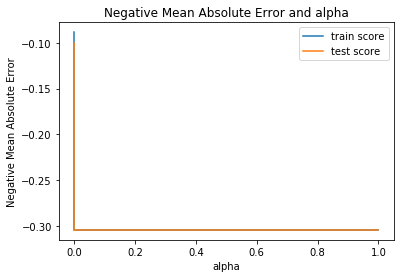

In [152]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [153]:
lasso = Lasso(alpha=0.0001)
final_lasso = lasso.fit(X_train[col], y_train)


array([ 0.61377385,  0.64857887,  0.34678328,  0.45576941,  0.4371865 ,
        0.        ,  1.17778686,  0.15468299,  0.06576203, -0.31000959,
        0.11781887,  0.2040536 ,  0.11692134,  0.13830788,  0.12238677,
       -0.17608338,  0.27466939, -0.21625622,  0.15951475, -0.15023762,
        0.06526148,  0.13940018, -0.13891298,  0.87323535,  0.8497512 ,
        0.75995914,  0.85846699, -0.51663333, -0.22643519, -0.176492  ])

## Rsquared value comparison for lasso

In [156]:
print("Lasso Regression final Rsquared Score for train and test data")
print('Rsq score for train set : {0}'.format(final_lasso.score(X_train[col],y_train)))
print('Rsq score for test set : {0}'.format(final_lasso.score(X_test[col],y_test)))

Lasso Regression final Rsquared Score for train and test data
Rsq score for train set : 0.8921997524659909
Rsq score for test set : 0.826386486561848


In [190]:
coef_df_lasso=pd.DataFrame(list(zip(X_train[col].columns,final_lasso.coef_)),columns=['Column','Coef'])
coef_df_lasso["Absolute Coef"] = abs(coef_df_lasso['Coef'])
coef_df_lasso.sort_values("Absolute Coef", ascending = False)

Column      Coef  Absolute Coef
6              GrLivArea  1.177787       1.177787
23      RoofMatl_CompShg  0.873235       0.873235
26      RoofMatl_WdShngl  0.858467       0.858467
24         RoofMatl_Roll  0.849751       0.849751
25      RoofMatl_Tar&Grv  0.759959       0.759959
1            OverallQual  0.648579       0.648579
0                LotArea  0.613774       0.613774
27   Exterior1st_BrkComm -0.516633       0.516633
3              YearBuilt  0.455769       0.455769
4               1stFlrSF  0.437186       0.437186
2            OverallCond  0.346783       0.346783
9           KitchenAbvGr -0.310010       0.310010
16           Street_Pave  0.274669       0.274669
28       Foundation_Wood -0.226435       0.226435
17          LotShape_IR3 -0.216256       0.216256
11            GarageCars  0.204054       0.204054
29       Functional_Maj2 -0.176492       0.176492
15              PoolArea -0.176083       0.176083
18  Neighborhood_Crawfor  0.159515       0.159515
7           BsmtFullBath  0.154683       0.154683
19  Neighborhood_MeadowV -0.150238       0.150238
21  Neighborhood_StoneBr  0.139400       0.139400
22        BldgType_Twnhs -0.138913       0.138913
13             3SsnPorch  0.138308       0.138308
14           ScreenPorch  0.122387       0.122387
10          TotRmsAbvGrd  0.117819       0.117819
12           OpenPorchSF  0.116921       0.116921
8               FullBath  0.065762       0.065762
20  Neighborhood_NoRidge  0.065261       0.065261
5               2ndFlrSF  0.000000       0.000000

# Assignment Subjective question solution

Double the value of alpha for Rigde and lasso

### Building Ridge model with alpha = 0.4 i.e 2*(0.2)

In [ ]:
ridge_updated =Ridge(alpha=0.6).fit(X_train[col],y_train)
print('R2 Score Train set : {0}'.format(ridge_updated.score(X_train[col],y_train)))
print('R2 Score Test set : {0}'.format(ridge_updated.score(X_test[col],y_test)))

### New Top Features for Ridge

In [184]:
new_ridge_coef=pd.DataFrame(list(zip(X_train[col].columns,ridge_updated.coef_)),columns=['Column','Coef'])
new_ridge_coef.iloc[new_ridge_coef['Coef'].abs().sort_values(ascending=False).index].head(5)

R2 Score Train set : 0.8854662457807927
R2 Score Test set : 0.8468269006883403


Column      Coef
1        OverallQual  0.665824
4           1stFlrSF  0.626828
6          GrLivArea  0.583169
0            LotArea  0.444542
23  RoofMatl_CompShg  0.436023

## Building Lasso model with alpha = 0.0002

In [187]:
lasso_new=Lasso(alpha=0.0002).fit(X_train[col],y_train)
print('R2 Score Train set : {0}'.format(lasso_new.score(X_train[col],y_train)))
print('R2 Score Test set : {0}'.format(lasso_new.score(X_test[col],y_test)))

R2 Score Train set : 0.8896857859158196
R2 Score Test set : 0.8381629292672107


### NEW TOP FEATURES

In [188]:
coef_df_lasso_new=pd.DataFrame(list(zip(X_train[col].columns,lasso_new.coef_)),columns=['Column','Coef'])
coef_df_lasso_new.iloc[coef_df_lasso_new['Coef'].abs().sort_values(ascending=False).index].head(5)

Column      Coef
6          GrLivArea  1.112314
23  RoofMatl_CompShg  0.676632
1        OverallQual  0.665940
26  RoofMatl_WdShngl  0.654676
24     RoofMatl_Roll  0.566975

## QUESTION 3

To answer this we will have to create new lasso model 

In [192]:
X_train_new=X_train.copy()
X_train_new.drop(['GrLivArea','RoofMatl_CompShg','RoofMatl_WdShngl','RoofMatl_Roll','RoofMatl_Tar&Grv'],axis=1,inplace=True)
X_test_new=X_test.copy()
X_test_new.drop(['GrLivArea','RoofMatl_CompShg','RoofMatl_WdShngl','RoofMatl_Roll','RoofMatl_Tar&Grv'],axis=1,inplace=True)

In [193]:
from sklearn.feature_selection import RFE

lr=LinearRegression()
rfe=RFE(lr,50)
rfe.fit(X_train_new,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=50, step=1, verbose=0)

In [ ]:
X_train_rfe =X_train_scaled[X_train_scaled_3.columns[rfe.support_]]
X_test_rfe_3=X_test_scaled_3[X_train_rfe_3.columns]